In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib qt

import fix_path

from src.preprocessors.dasps import DaspsPreprocessor

In [2]:
ha = DaspsPreprocessor.get_ha_sam_trials()
la = DaspsPreprocessor.get_la_sam_trials()

# Baghdadi et al. have obtained 90 severe, 10 moderate and 156 normal trials
assert len(ha) * 2 == 90 + 10
assert len(la) * 2 == 156

(12, 1920, 14)
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (6.602 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Creating RawArray with float64 data, n_channels=14, n_times=3840
    Range : 0 ... 3839 =      0.000 ...    29.992 secs
Ready.
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2 events and 1920 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 2 events and 1920 original time points ...
Using matplotlib as 2D backend.
Using data from preloaded Raw for 2 events and 1920 original time points ...


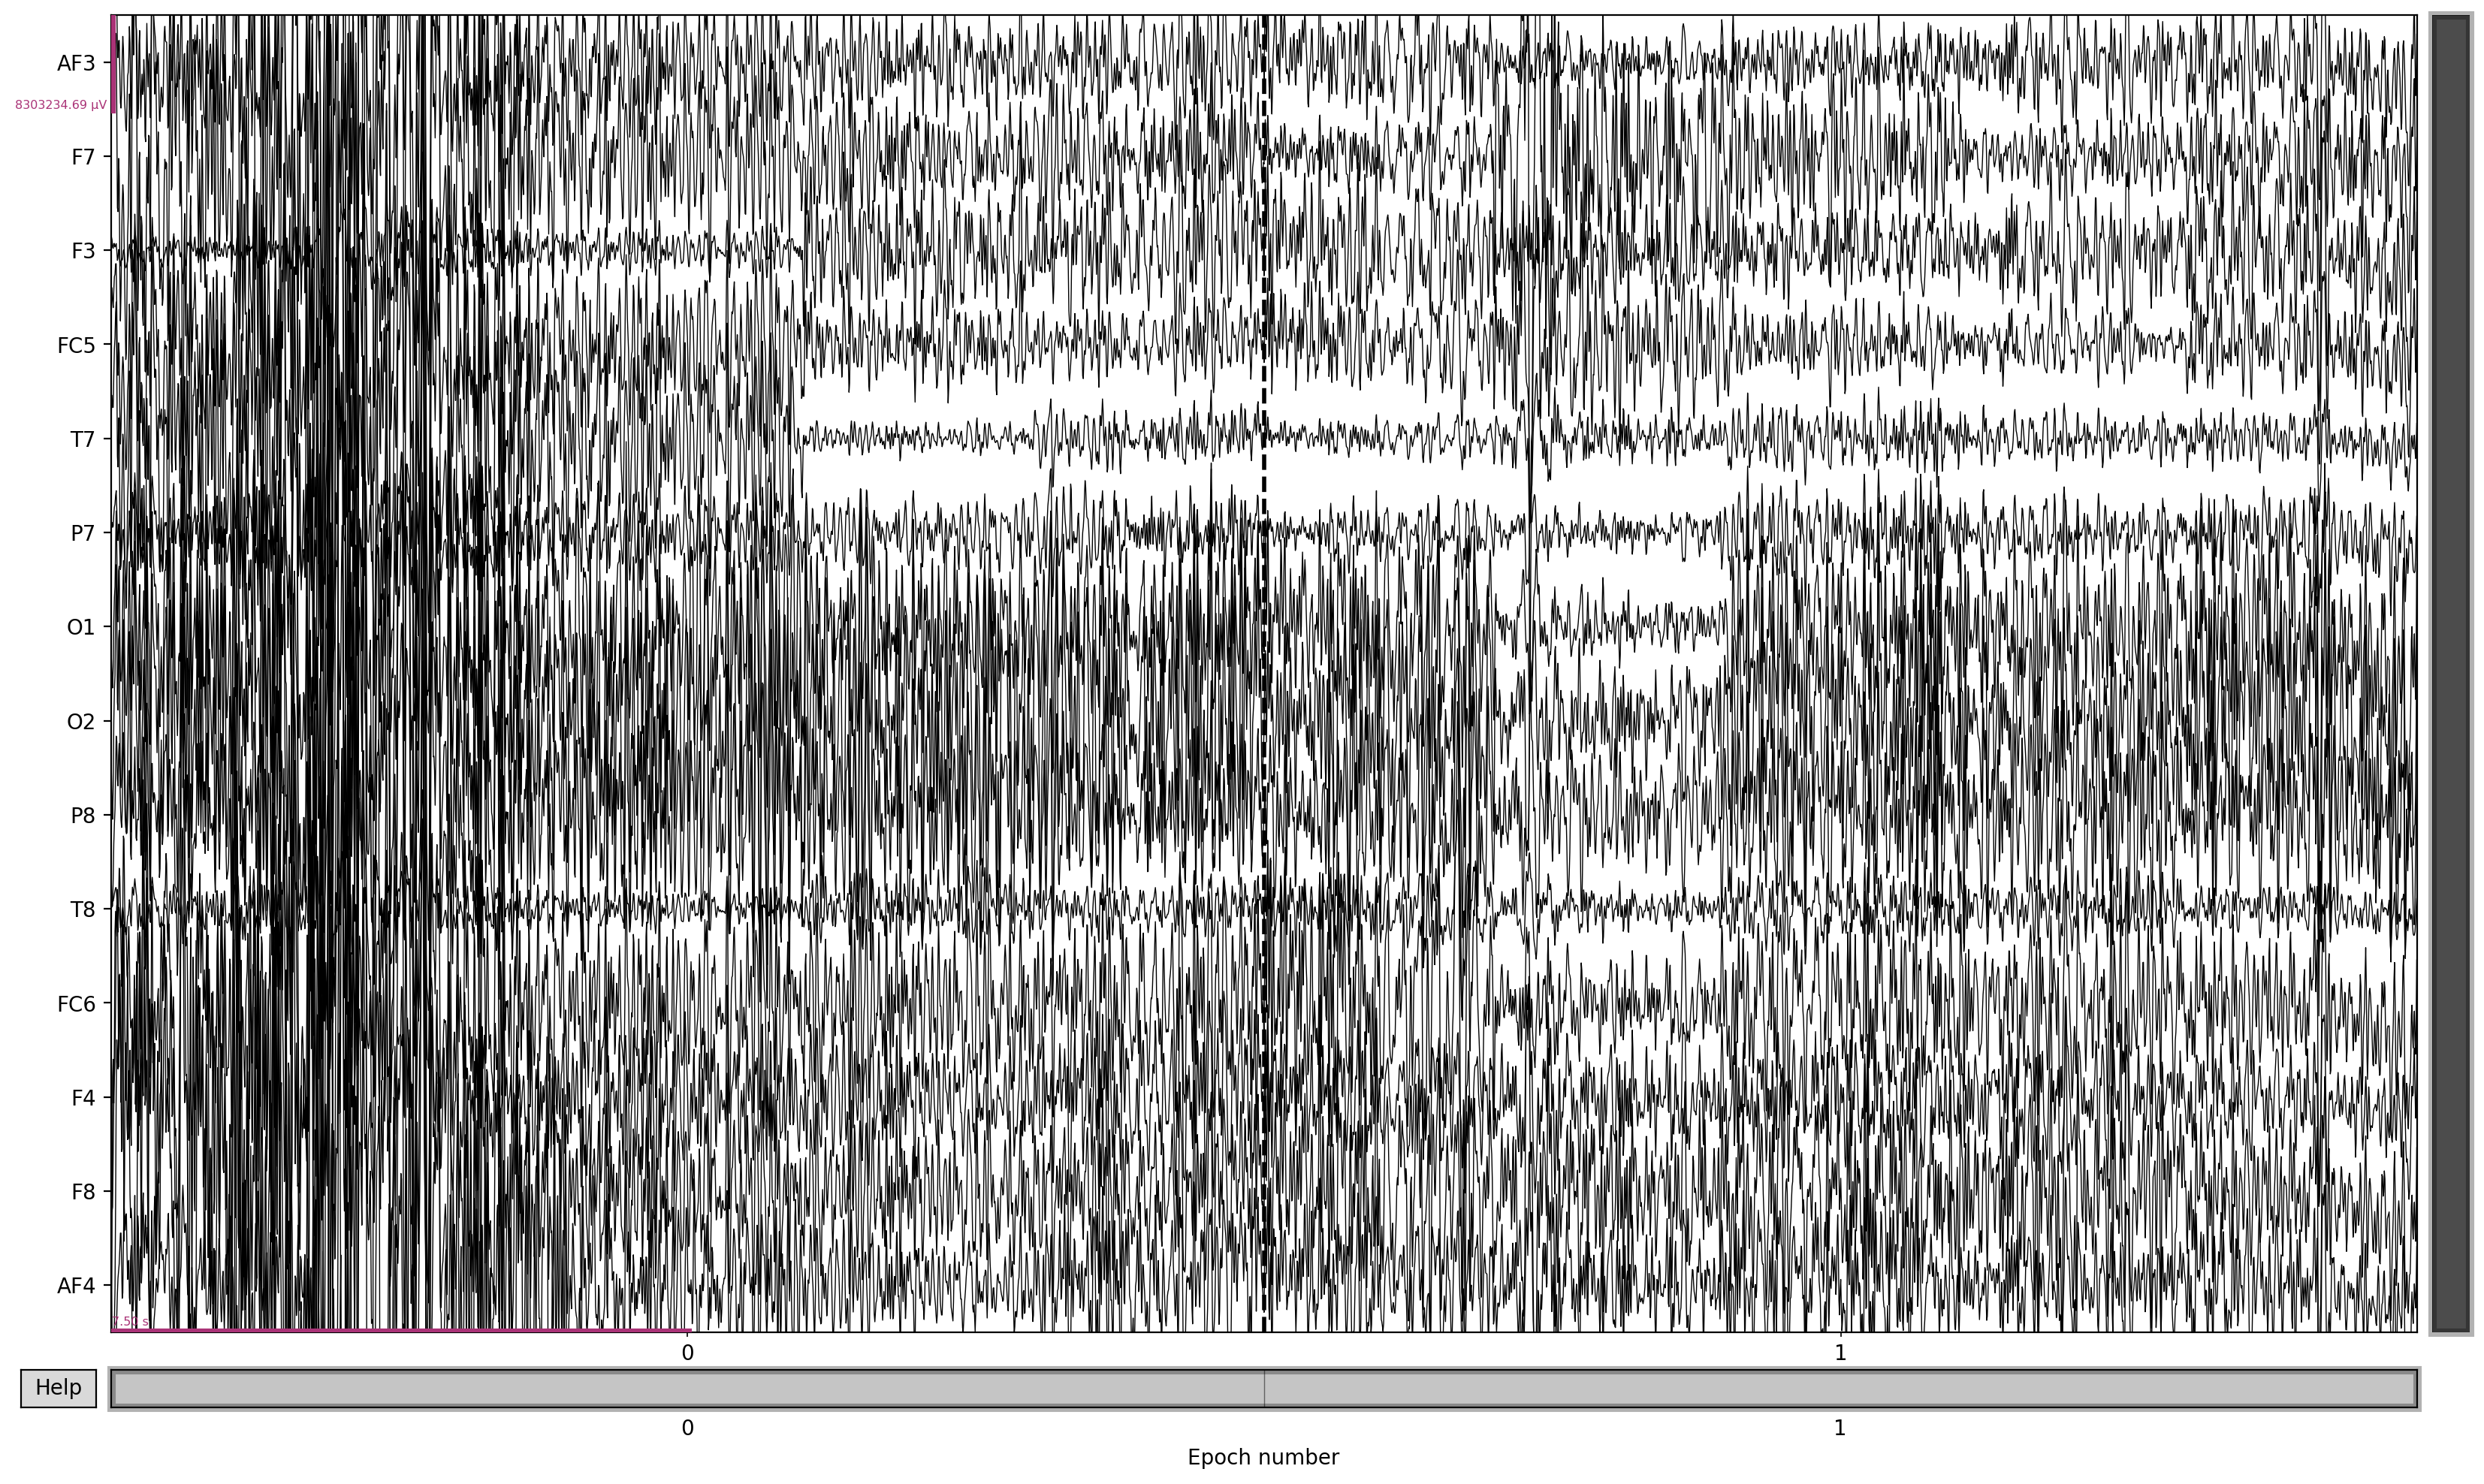

In [3]:
import numpy as np

epochs = ha[10].get_epochs_precleaned(15)

# np.mean(epochs.get_data())
epochs.plot(scalings="auto")
# min([i.get_epochs_custom_cleaned().n_times / 128 for i in ha])

In [4]:
ha[0].get_epochs_precleaned(1)

(12, 1920, 14)
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (6.602 s)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.0s.
Creating RawArray with float64 data, n_channels=14, n_times=3840
    Range : 0 ... 3839 =      0.000 ...    29.992 secs
Ready.
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items

2024-10-22 23:16:20.331 python[88028:1269721] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-22 23:16:20.331 python[88028:1269721] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/Users/jakubblaha/Documents/thesis/thesis-python/src/preprocessors/dasps.py:99: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (4.9) and smallest (1.6e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(epochs)


<Epochs | 30 events (good & bad), 0 – 0.992 s (baseline off), ~22 kB, data not loaded,
 '1': 30>

In [5]:
# HAM rating test
ham_ha = DaspsPreprocessor.get_ha_ham_subjects()
ham_la = DaspsPreprocessor.get_la_ham_subjects()

len(ham_ha)
len(ham_la)

7

(12, 1920, 14)
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated


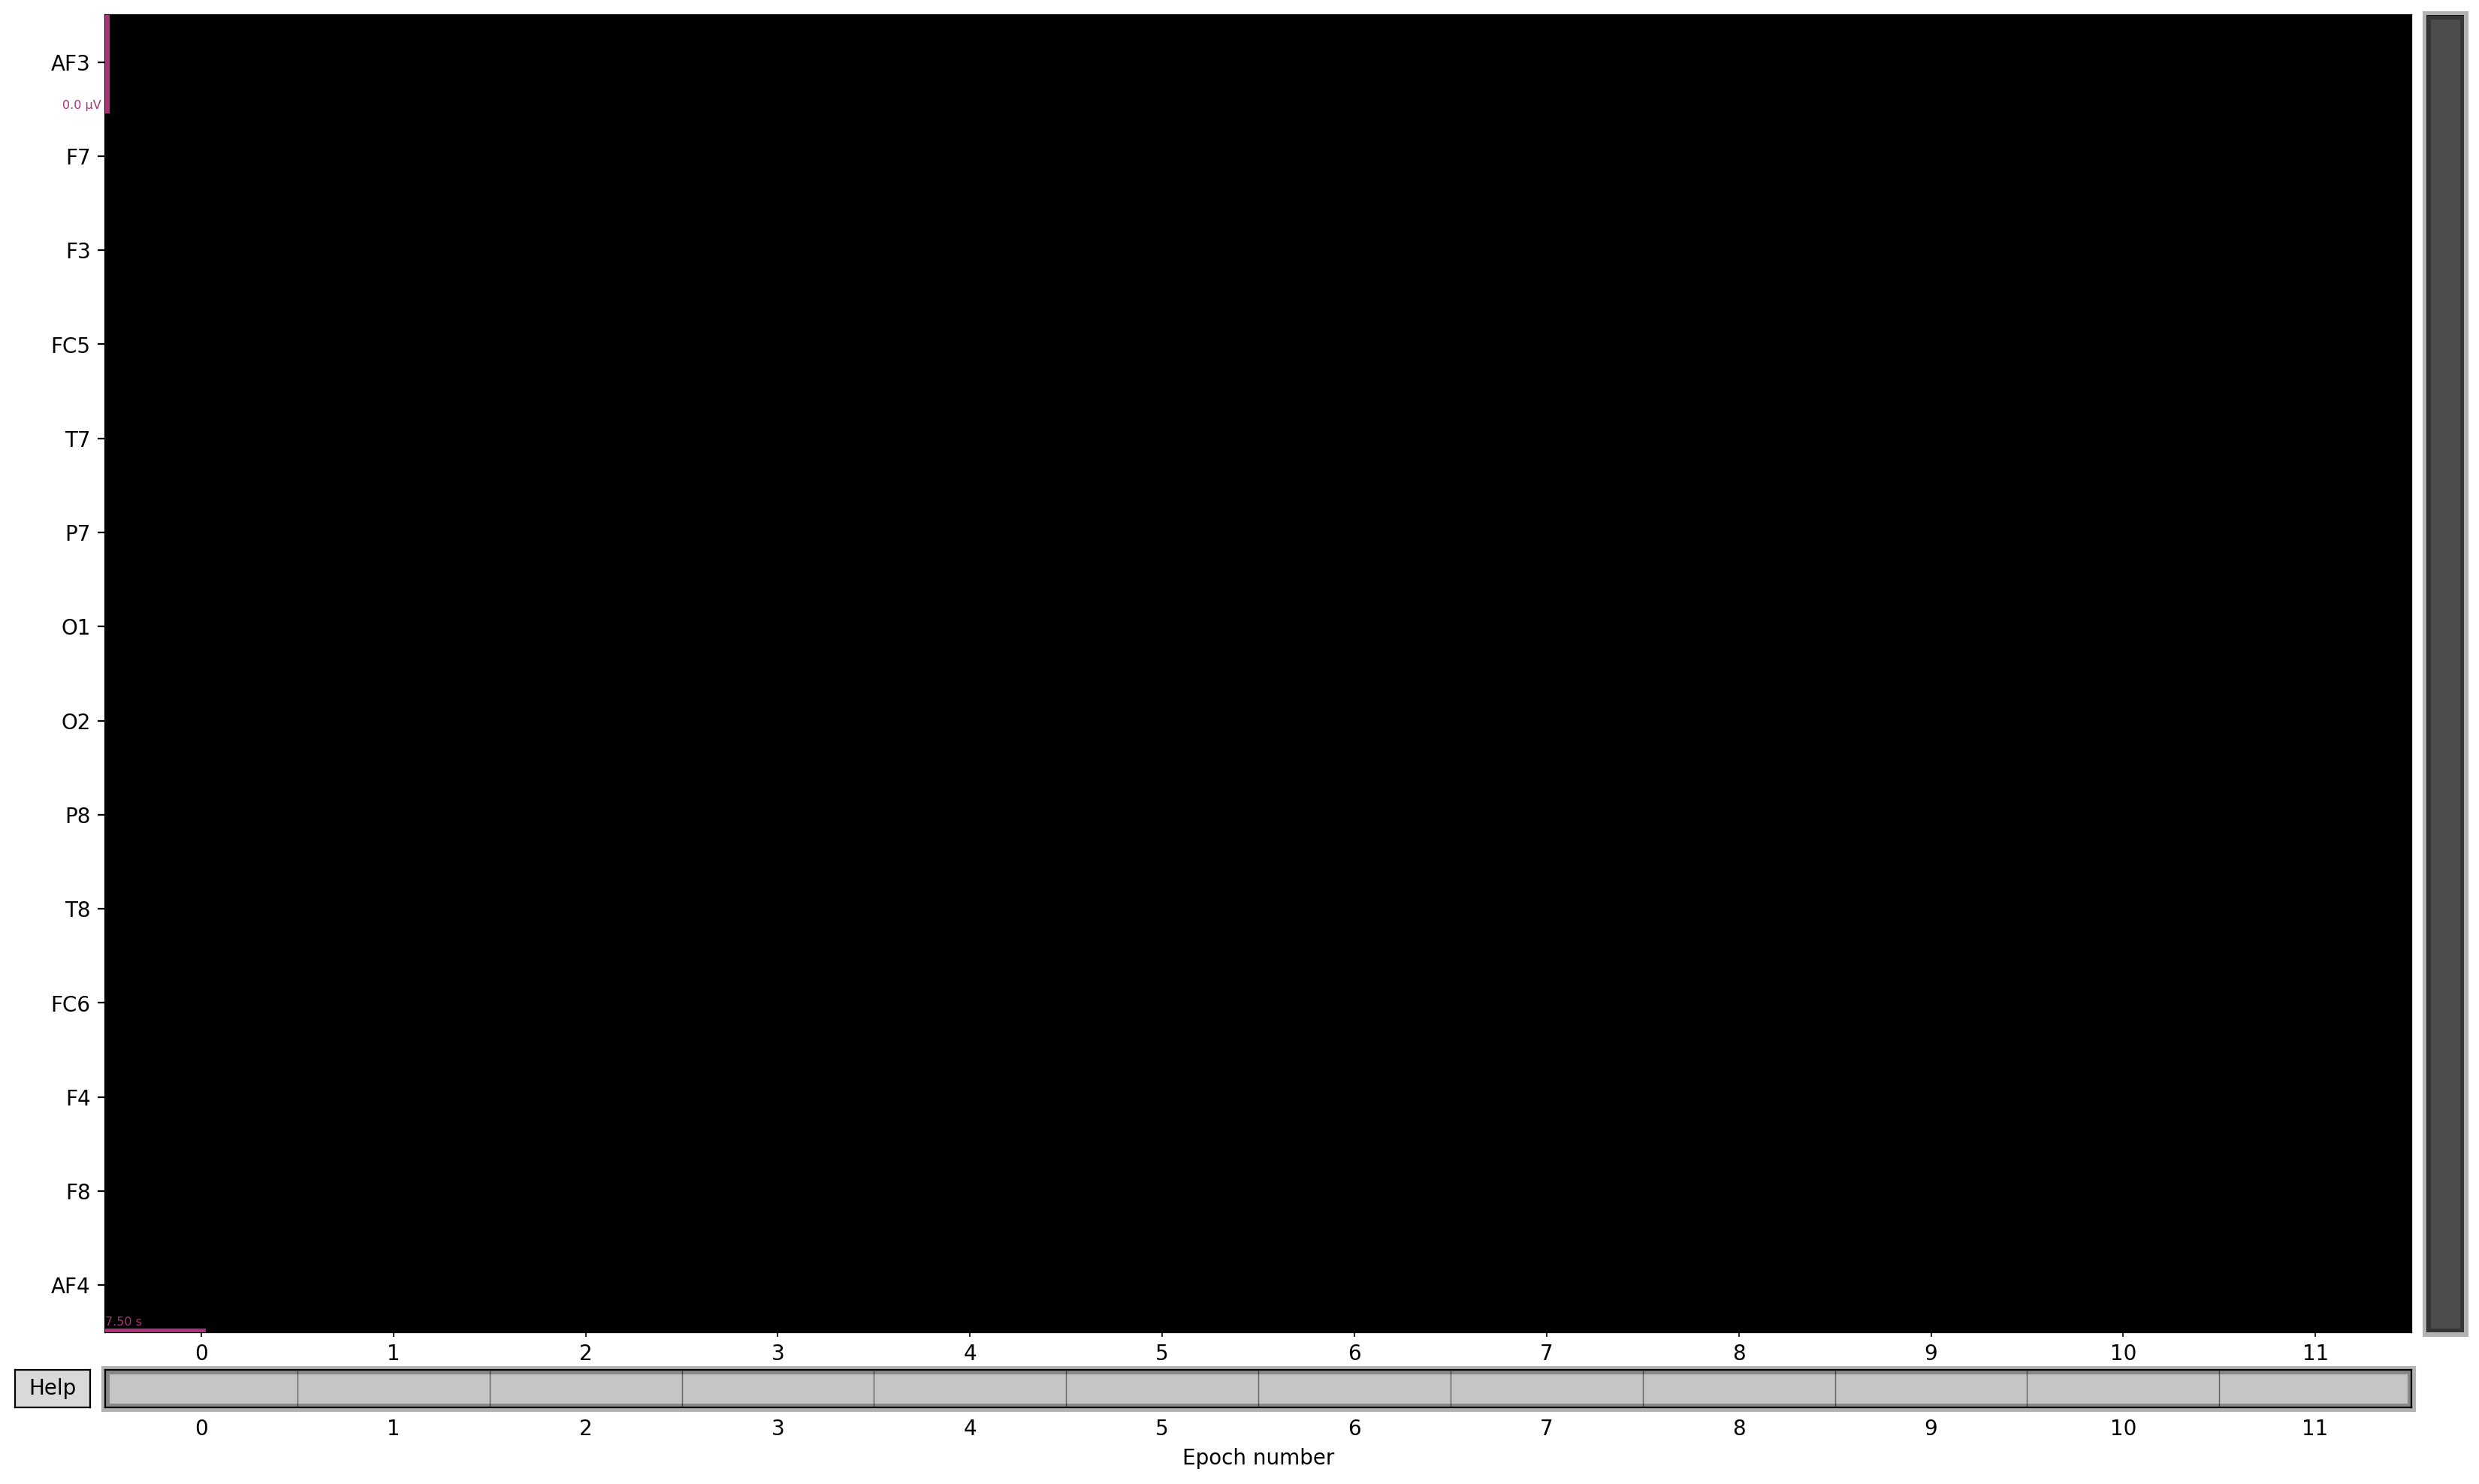

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [6]:
subjects = DaspsPreprocessor.get_ha_ham_subjects()

s = subjects[0]
s.get_epochs().plot(scalings="auto")